In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('max_columns', None)  # show all columns
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [6]:
df = pd.read_excel('/home/javier/mis_proyectos/DATAJAVI_V3_noblank.xlsx', engine='openpyxl')

In [7]:
df_2 = pd.read_excel('/home/javier/mis_proyectos/DATAJAVI_V3_noblank.xlsx', engine='openpyxl')  # to make changes

In [8]:
len(df)

20454

### Prepare data:
Discrete vars:  
- ```[setNumber, gameNumber, pointNumber, serveNumber, shotCount, efectividad,
1º o 2º saque, seve_class, Lado(1:iguales, 0:ventaja), DIRECCIÓN, X1,...]```

Discrete vars to delete (only one value) --> no information!  
```[Point,```

Continuous vars:  
- ```v(m/s), v(km/h), timeHIT,Y1, Y1(ABS), Z1(h), timeNET, TimeN-TimeH,
timeBounce, TimeB-TimeH,PreVx, PreVy, PreVz, PreV, PostVx, PostVy,
PostVz, PostV, Dif. V1-V2, Dif(km/h)```


Vars to delete (duplicated or all the same):
- ```v(km/h), Dif. (km/h), Point,```

In [10]:
### filter by gender
print(f"Before gender filtering: {len(df)}")
df = df[df['Sexo']==1]
print(f"after: {len(df)}")
df_2 = df_2[df_2['Sexo']==1]

Before gender filtering: 20454
after: 20454


In [11]:
df_2.isnull().sum()

Sexo                                        0
1º o 2º saque                               0
Efectividad                                 0
Lado(1:Iguales;0:Ventaja)                   0
DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T    0
V(km/h)                                     0
[YA]                                        0
ZA                                          0
Znet                                        0
TIME                                        0
difV                                        0
&(deg)                                      0
ANG. IN                                     0
dLinea                                      0
dtype: int64

In [12]:
### Check how many rows have empty values or NaNs
print(df_2.isnull().sum().sum(), '/', len(df_2))  ### too many, we can't just delete rows with empty values --> interpolate

0 / 20454


In [13]:
### interpolate NaN with none-linearities
for i in df_2.columns:
    df_2[i] = df_2[i].interpolate(method='polynomial', order=2)

In [14]:
print(df_2.isnull().sum().sum(), '/', len(df_2))

0 / 20454


In [34]:
df_2.drop(columns=['Sexo'], inplace=True), df.drop(columns=['Sexo'], inplace=True)

(None, None)

In [35]:
df_2.describe()

,1º o 2º saque,Efectividad,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,V(km/h),[YA],ZA,Znet,TIME,difV,&(deg),ANG. IN,dLinea
count,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000
mean,1.308399,3.032316,0.522343,2.070451,174.440181,1.762130,2.867122,1.149802,0.423751,8.692615,5.379175,11.423949,1.042840
std,0.461844,1.011730,0.499513,0.821516,19.411117,0.672477,0.151205,0.116511,0.052495,1.610355,4.859932,2.682266,0.566494
min,1.000000,1.000000,0.000000,1.000000,73.296000,0.005000,2.078000,0.937000,0.242000,-17.917227,0.033120,6.427432,0.000000
25%,1.000000,2.000000,0.000000,1.000000,160.596000,1.314250,2.780000,1.061000,0.384000,7.997143,2.603517,9.590657,0.574000
50%,1.000000,3.000000,1.000000,2.000000,176.184000,1.782000,2.851000,1.138000,0.416000,8.610471,4.360558,10.226733,1.003000
75%,2.000000,4.000000,1.000000,3.000000,189.036000,2.230000,2.936000,1.221000,0.458000,9.267095,5.980106,12.777876,1.529000
max,2.000000,4.000000,1.000000,3.000000,236.268000,4.714000,4.435000,2.281000,0.655000,35.427279,28.288601,26.452045,2.057000


In [36]:
df.reset_index(drop=True, inplace=True)
df

,1º o 2º saque,Efectividad,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,V(km/h),[YA],ZA,Znet,TIME,difV,&(deg),ANG. IN,dLinea
0,1,2,1,2,149.292,2.286,3.174,1.149,0.474,8.409960,4.469013,13.350081,1.751
1,1,3,0,1,183.276,0.871,2.886,1.179,0.420,9.380318,5.210301,9.329834,0.491
2,1,2,1,2,150.732,1.964,2.912,1.284,0.503,7.920631,3.775683,12.681232,1.435
3,2,2,0,1,126.792,0.817,3.030,1.525,0.606,8.186052,3.124373,9.846737,1.143
4,1,3,1,2,141.372,1.088,2.904,1.239,0.504,8.064863,3.428793,12.756220,1.504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20449,1,2,1,3,170.820,1.007,2.719,1.243,0.435,9.253452,6.325629,13.849385,0.078
20450,2,4,0,2,150.552,1.427,2.703,1.244,0.492,8.955988,2.099419,9.181022,1.685
20451,1,4,0,1,138.276,2.411,2.956,1.455,0.565,7.640005,6.272937,9.388508,0.193
20452,2,3,0,3,160.884,1.232,2.729,1.150,0.450,8.483405,3.997884,9.587342,0.623


In [37]:
df_new = df[['Efectividad']]

In [38]:
len(df_new)

20454

In [39]:
df_2.to_csv('../predictions/df_2.csv')

In [40]:
df_2.Efectividad.values

array([2, 3, 2, ..., 4, 3, 4])

In [25]:
# sorted(df_2.columns)

startScore_Server  = [0 15 30 40 50 3 4 6 1 5 7 8 2 'WIN' 9 10 11 12 13]  
startScore_Receiver = [0 15 40 50 30 1 2 5 6 3 7 4 8 'LOS' 9 10 11 12 13]

I don't understand this variable ... not in a format the machine can understand. Delete for the moment

EventID: I don't think the machine can understand this variable for the moment ...   
   not clear how to show to the machine (162 events?)... we will show all events as one for the moment

In [44]:
### delete vars
df_2.drop(['V (km/h)', 'Dif. (km/h)', 'Point', 'EventID', 'startScore_Server', 'startScore_Receiver'], axis=1, inplace=True)

In [64]:
len(encoder)

TypeError: object of type 'OneHotEncoder' has no len()

In [26]:
def one_hot(df, cols_list):
    """
    cols_list=['service', 'gender', ...]
    """
    #perform one-hot encoding on 'team' column
    print(len(df))
    for i in cols_list:
        df_discrete = df[cols_list]
        encoder_df = pd.DataFrame(encoder.fit_transform(df_discrete[[i]]).toarray())
        ### rename columns
        l = [i+'___'+str(x) for x in encoder.categories_[0]]
        # print(l)
        encoder_df.columns = l # encoder.categories_
        # merge one-hot encoded columns back with original DataFrame
        df = pd.concat([df, encoder_df], axis=1)
    df.drop(cols_list, axis=1, inplace=True)  # DROP OLD COLUMN
    return df

df_new = one_hot(df_new, ['serve_class'])

TypeError: one_hot() missing 1 required positional argument: 'cols_list'

array([[<AxesSubplot:title={'center':'1º o 2º saque'}>,
        <AxesSubplot:title={'center':'Efectividad'}>,
        <AxesSubplot:title={'center':'Lado(1:Iguales;0:Ventaja)'}>,
        <AxesSubplot:title={'center':'DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T'}>],
       [<AxesSubplot:title={'center':'V(km/h)'}>,
        <AxesSubplot:title={'center':'[YA]'}>,
        <AxesSubplot:title={'center':'ZA'}>,
        <AxesSubplot:title={'center':'Znet'}>],
       [<AxesSubplot:title={'center':'TIME'}>,
        <AxesSubplot:title={'center':'difV'}>,
        <AxesSubplot:title={'center':'&(deg)'}>,
        <AxesSubplot:title={'center':'ANG. IN'}>],
       [<AxesSubplot:title={'center':'dLinea'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

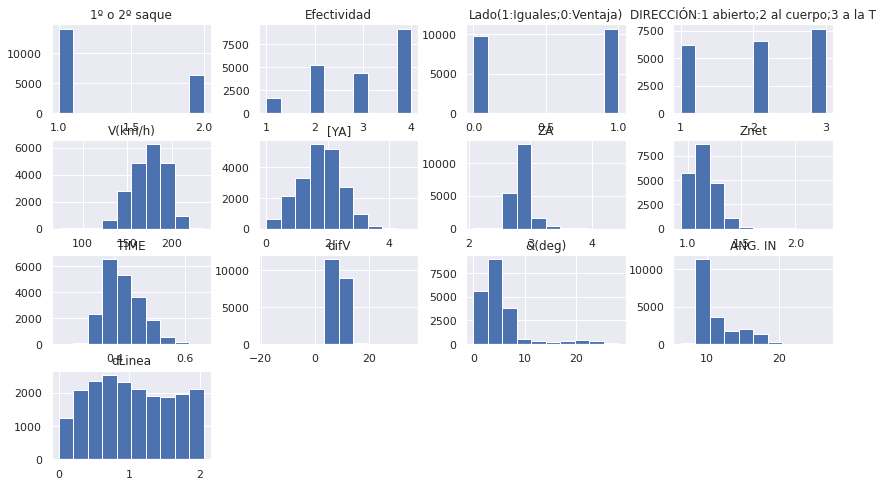

In [41]:
df.hist(figsize=(14,8))

<AxesSubplot:>

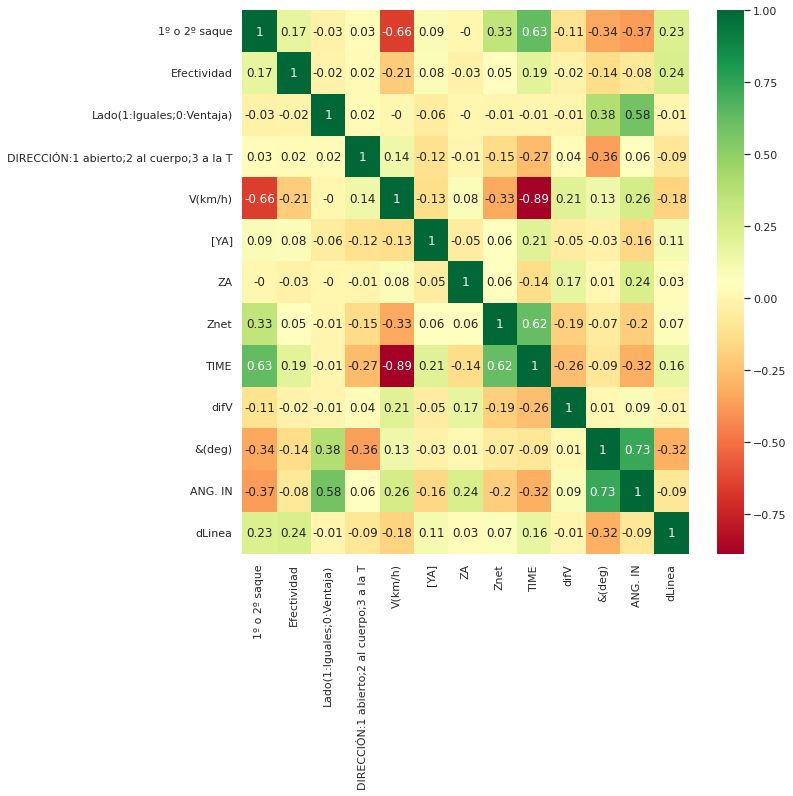

In [42]:
### Plot Correlation Matrix
sn.set(rc={"figure.figsize":(10, 10)})
sn.heatmap(df.corr().round(decimals=2), annot=True, cmap='RdYlGn') # annot=True ,

In [104]:
### Find how many serve cats have Efectividad 1
Aces = df_new[df_new['serve_class___ACE']==1]
Faults = df_new[df_new['serve_class___FAULT']==1]
Not_Returned = df_new[df_new['serve_class___NOT RETURNED']==1]
Returned = df_new[df_new['serve_class___RETURNED']==1]

,Efectividad,shotCount
count,1175.000000,1175.0
mean,0.904681,1.0
std,0.293780,0.0
min,0.000000,1.0
25%,1.000000,1.0
50%,1.000000,1.0
75%,1.000000,1.0
max,1.000000,1.0


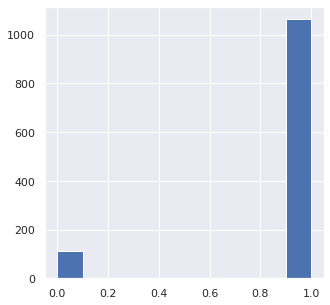

In [118]:
Aces.Efectividad.hist(figsize = (5,5))
Aces.describe()[['Efectividad', 'shotCount']]

,Efectividad,shotCount
count,6753.000000,6753.0
mean,0.232489,1.0
std,0.422451,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,0.000000,1.0
75%,0.000000,1.0
max,1.000000,1.0


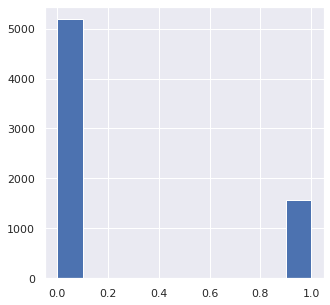

In [117]:
Faults.Efectividad.hist(figsize=(5,5))
Faults.describe()[['Efectividad', 'shotCount']]

,Efectividad,shotCount
count,9506.000000,9506.000000
mean,0.070482,4.472333
std,0.255971,2.427512
min,0.000000,1.000000
25%,0.000000,3.000000
50%,0.000000,4.000000
75%,0.000000,5.000000
max,1.000000,26.000000


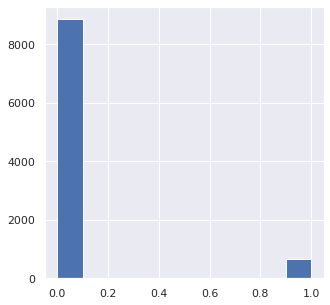

In [116]:
Returned.Efectividad.hist(figsize=(5,5))
Returned.describe()[['Efectividad', 'shotCount']]

,Efectividad,shotCount
count,4181.000000,4181.000000
mean,0.869170,1.972016
std,0.337255,0.320633
min,0.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,1.000000,7.000000


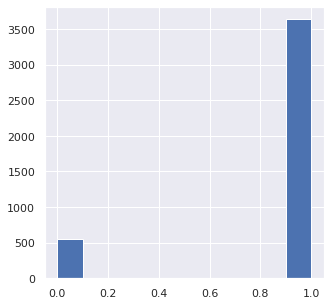

In [115]:
Not_Returned.Efectividad.hist(figsize=(5,5))
Not_Returned.describe()[['Efectividad', 'shotCount']]

In [11]:
df_3 = one_hot(df_2, discrete_one_hot)

one hot on 'serve_class'
encoder.categories_:  ['ACE', 'FAULT', 'NOT RETURNED', 'RETURNED']


In [12]:
df_3

,Sexo,setNumber,gameNumber,pointNumber,serveNumber,shotCount,Efectividad,1º o 2º saque,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,...,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,serve_class___ACE,serve_class___FAULT,serve_class___NOT RETURNED,serve_class___RETURNED
0,1,1,1,1,1,2,1,1,1,2,...,31.203651,21.263,5.684,6.380,22.915659,8.287992,0.0,0.0,1.0,0.0
1,1,1,1,2,1,4,0,1,0,1,...,35.767428,24.944,-5.850,6.801,26.508098,9.259331,0.0,0.0,0.0,1.0
2,1,1,1,3,1,2,1,1,1,2,...,30.302482,21.009,5.585,7.058,22.855758,7.446724,0.0,0.0,1.0,0.0
3,1,1,1,4,1,1,1,2,0,1,...,24.999723,15.163,-3.431,6.906,17.011207,7.988516,0.0,1.0,0.0,0.0
4,1,1,2,1,1,4,0,1,1,2,...,27.657937,18.158,2.731,6.956,19.635612,8.022325,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29188,1,3,9,1,1,2,0,1,1,3,...,33.999023,-23.728,-2.379,6.608,24.745571,9.253452,0.0,0.0,1.0,0.0
29189,1,3,9,3,1,1,0,2,0,2,...,29.762144,-19.062,-4.510,7.014,20.806156,8.955988,0.0,1.0,0.0,0.0
29190,1,3,9,4,1,3,0,1,0,1,...,27.476137,-17.347,6.608,6.992,19.836132,7.640005,0.0,0.0,0.0,1.0
29191,1,3,9,5,1,1,0,2,0,3,...,31.018599,-21.329,-2.954,6.647,22.535194,8.483405,0.0,1.0,0.0,0.0


In [43]:
corr = df_2.corr(method='pearson').Efectividad.sort_values(ascending=False)
correlated_cols = list(corr[corr>0].index)

In [44]:
correlated_cols

['Efectividad',
 'dLinea',
 'TIME',
 '1º o 2º saque',
 '[YA]',
 'Znet',
 'DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T']

In [45]:
corr

Efectividad                                 1.000000
dLinea                                      0.244283
TIME                                        0.194283
1º o 2º saque                               0.169003
[YA]                                        0.076397
Znet                                        0.052546
DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T    0.018908
Lado(1:Iguales;0:Ventaja)                  -0.015022
difV                                       -0.019550
ZA                                         -0.033600
ANG. IN                                    -0.081613
&(deg)                                     -0.137573
V(km/h)                                    -0.212049
Name: Efectividad, dtype: float64

#### **Conclusión:**
las correlaciones positivas son las que están correlacionadas con efectividad = 1,
pero las negativas pueden estar correlacionadas con efectividad nula, la cual es info válida tb.

Vamos a preparar dos datasets, uno con las positivas y otro con todas, Entrenar un par de modelos y sacar conclusiones.

Also, for the moment we are goind to delete the eventID --> 162 different events ... 

In [46]:
df_positive_corr = df_2[correlated_cols]
# df_positive_corr.head()

In [47]:
df_positive_corr_copy = df_positive_corr

## Filter Outliers

In [18]:
cols = ['Y1(ABS)'] # one or more
Q1 = df_positive_corr[cols].quantile(0.25)
Q3 = df_positive_corr[cols].quantile(0.99)
IQR = Q3 - Q1
df_positive_corr = df_positive_corr[~((df_positive_corr[cols] < (Q1 - 1.5 * IQR)) |(df_positive_corr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

cols = ['Dif. V1-V2'] # one or more
Q1 = df_positive_corr[cols].quantile(0.25)
Q3 = df_positive_corr[cols].quantile(0.75)
IQR = Q3 - Q1
df_positive_corr = df_positive_corr[~((df_positive_corr[cols] < (Q1 - 1.5 * IQR)) |(df_positive_corr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

cols = ['PostV'] # one or more
Q1 = df_positive_corr[cols].quantile(0.05)
Q3 = df_positive_corr[cols].quantile(0.75)
IQR = Q3 - Q1
df_positive_corr = df_positive_corr[~((df_positive_corr[cols] < (Q1 - 1.5 * IQR)) |(df_positive_corr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

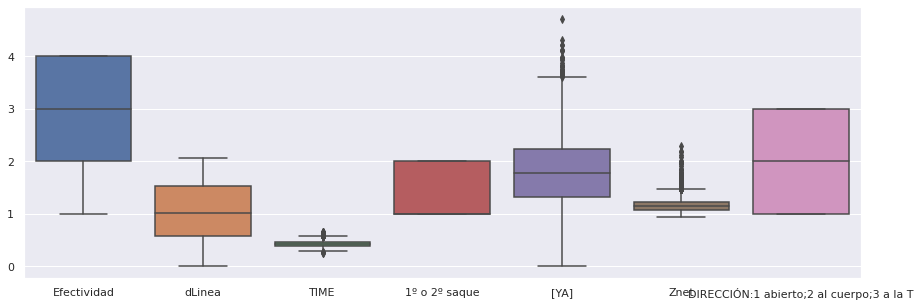

In [48]:
import numpy as np
import seaborn as sn
sn.set(rc={"figure.figsize":(15, 5)})
sn.boxplot(data=df_positive_corr)

In [49]:
### save as csv
### split before preprocessing, to avoid data leakage
XX, yy = df_positive_corr, df_positive_corr.Efectividad
XX.drop('Efectividad', axis=1, inplace=True)

# Creating a dataframe with 80%
# values of original dataframe
Xtrain = XX.sample(frac = 0.8)
Ytrain = yy.sample(frac = 0.8)
 
# Creating dataframe with
# rest of the 20% values
Xtest = XX.drop(Xtrain.index)
Ytest = yy.drop(Ytrain.index)

/home/javier/pyenvs/tennis/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
Xtrain.to_csv('../predictions/Xtrain.csv')
Ytrain.to_csv('../predictions/Ytrain.csv')
Xtest.to_csv('../predictions/Xtest.csv')
Ytest.to_csv('../predictions/Ytest.csv')

In [21]:
!pwd

/home/javier/mis_proyectos/tennis/EDA


### Algorithms:

In [53]:
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### split before preprocessing, to avoid data leakage
# XX, yy = df_positive_corr, df_positive_corr.Efectividad
# XX.drop('Efectividad', axis=1, inplace=True)

# X, y = XX.values, yy.values # .reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# X, y = df_positive_corr.values, df_positive_corr.Efectividad.values # .reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='rbf')
svclassifier.fit(Xtrain, Ytrain)

Ypred = svclassifier.predict(Xtest)

# print(confusion_matrix(y_test, y_pred))
print(classification_report(Ytest, Ypred))


### try with df_positive_corr_copy  # validate with the original dataset
# XX, yy = df_positive_corr_copy, df_positive_corr_copy.Efectividad
# XX.drop('Efectividad', axis=1, inplace=True)
# X, y = XX.values, yy.values # .reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Ypred = svclassifier.predict(Xtest)

# print('\n', confusion_matrix(y_test, y_pred))
print('\n', classification_report(Ytest, Ypred))

/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       315
           2       0.00      0.00      0.00      1059
           3       0.00      0.00      0.00       896
           4       0.45      1.00      0.62      1821

    accuracy                           0.45      4091
   macro avg       0.11      0.25      0.15      4091
weighted avg       0.20      0.45      0.27      4091


               precision    recall  f1-score   support

           1       0.00      0.00      0.00       315
           2       0.00      0.00      0.00      1059
           3       0.00      0.00      0.00       896
           4       0.45      1.00      0.62      1821

    accuracy                           0.45      4091
   macro avg       0.11      0.25      0.15      4091
weighted avg       0.20      0.45      0.27      4091



/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
### apply zscore to X
# XX, yy = df_positive_corr, df_positive_corr.Efectividad
# XX.drop('Efectividad', axis=1, inplace=True)

from sklearn.preprocessing import MinMaxScaler

# X, y = XX.values, yy.values # .reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

model = SVC(kernel='rbf')
model.fit(X_train_scaled, Ytrain)
y_pred = model.predict(X_test_scaled)
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       315
           2       0.00      0.00      0.00      1059
           3       0.00      0.00      0.00       896
           4       0.45      1.00      0.62      1821

    accuracy                           0.45      4091
   macro avg       0.11      0.25      0.15      4091
weighted avg       0.20      0.45      0.27      4091



/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
### save final dataset
import pickle as pkl

#to save it
with open("train.pkl", "wb") as f:
    pkl.dump([X_train_scaled, Ytrain], f)
    
#to save it
with open("test.pkl", "wb") as f:
    pkl.dump([X_test_scaled, Ytest], f)    

# #to load it
# with open("train.pkl", "r") as f:
#     train_x, train_y = pkl.load(f)

In [57]:
X_train_scaled

array([[0.32766164, 0.27845036, 0.        , 0.57400722, 0.08333333,
        1.        ],
       [0.43218279, 0.47215496, 0.        , 0.46740285, 0.19196429,
        0.        ],
       [0.22848809, 0.49636804, 1.        , 0.4378849 , 0.25744048,
        0.        ],
       ...,
       [0.61837628, 0.47215496, 0.        , 0.57337014, 0.08630952,
        0.        ],
       [0.17890131, 0.30024213, 0.        , 0.15056275, 0.05133929,
        1.        ],
       [0.18230433, 0.44794189, 0.        , 0.35102994, 0.25892857,
        0.        ]])

In [59]:
X_train_scaled
X_test_scaled
Ytest
Ytrain

10798    2
9147     2
4618     4
13722    4
12658    4
        ..
5407     4
1728     4
8873     1
5048     4
6180     3
Name: Efectividad, Length: 16363, dtype: int64

## Try all possible algorithms and compare! 
Here starts the fun part 

## Lessons learnt - TODOES:  
- use df_3, not the top correlated df  
- using V vs Efectividad gives almos tthe same results!  
- Try all algorithms with all 3 X options!!  
    - V vs Efectividad
    - df_3 vs Efectividad
    - Max_correlated_vars_df vs Efectividad

In [60]:
import pickle

# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Load Data:
X_train_scaled, y_train = pickle.load(open("train.pkl", "rb"))  # X_train_scaled, y_train
X_test_scaled, y_test = pickle.load(open("test.pkl", "rb"))     # 

### load the model
model = pickle.load(open("model.pkl", "rb"))

## use model to predict
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

ValueError: X has 6 features, but SVC is expecting 13 features as input.

In [61]:
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       315
           2       0.00      0.00      0.00      1059
           3       0.00      0.00      0.00       896
           4       0.45      1.00      0.62      1821

    accuracy                           0.45      4091
   macro avg       0.11      0.25      0.15      4091
weighted avg       0.20      0.45      0.27      4091



/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
### Let's play with some Hyperparameters Cross-Validation search:
# C: Regularization parameter   -   float, default=1.0   -  Lambda in formulation
# gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

classification_report(y_test, y_pred, output_dict=True)['accuracy']

/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.44512344170129553

In [63]:
X_train_scaled.var()

0.09999614561020503

In [64]:
gamma = 1 / (X_train_scaled.shape[1]*X_train_scaled.var())  # gamma = 1 / (n_features * X_train_scaled.var()) 
gamma  ### default gamma

1.6667309089727316

In [65]:
### create the values for the grid
C_search     = [0.01, 0.1, 0.5, 0.75, 1,   1.50, 2.0]
gamma_search = [0.01, 0.1, 0.5, 0.75, 1,   1.25, 1.5]

In [44]:
# from tqdm import tqdm
# results_dicto = []
# 
# for c in tqdm(C_search, desc='Iter. over Regularization parameter & kernel gammas'):
#     for g in gamma_search:
#         m = SVC(kernel='rbf', C=c, gamma=g)  # model  # tol = cost function tolerance
#         m.fit(X_train_scaled, y_train)
#         y_pred = m.predict(X_test_scaled)
#         cls_acc = classification_report(y_test, y_pred, output_dict=True)['accuracy']
#         results = {'lambda': m.C, 'gamma': m.gamma, 'accuracy': cls_acc}
#         results_dicto.append(results)
# 
# print()
# results_dicto

In [45]:
max([x['accuracy'] for x in nested_dicto]), m.C, m.gamma

(0.8746723850369311, 2.0, 1.5)

In [66]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [67]:
y_test = Ytest

In [68]:
"""
X_train_scaled, y_train
X_test_scaled, y_test
"""
model = XGBClassifier()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

/home/javier/pyenvs/tennis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.07      0.00      0.01       315
           2       0.24      0.08      0.12      1059
           3       0.19      0.04      0.07       896
           4       0.44      0.86      0.59      1821

    accuracy                           0.41      4091
   macro avg       0.24      0.25      0.20      4091
weighted avg       0.31      0.41      0.31      4091



In [69]:
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(n_splits=numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

clf.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [70]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Try so autoML frameworks

In [3]:
# ### not working on jupyter
# import autosklearn.classification
# cls = autosklearn.classificationcls.fit(X_train_scaled, y_train)
# y_pred = cls.predict(X_test_scaled)
# print(classification_report(y_test, y_pred))

### not working on jupyter

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_scaled, y_train)   # X_train_scaled, y_train
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       315
           2       0.00      0.00      0.00      1059
           3       0.00      0.00      0.00       896
           4       0.45      1.00      0.62      1821

    accuracy                           0.45      4091
   macro avg       0.11      0.25      0.15      4091
weighted avg       0.20      0.45      0.27      4091



/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/javier/pyenvs/tennis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
"""
X_train_scaled, y_train
X_test_scaled, y_test
"""

import lightgbm as lgb
from lightgbm import LGBMClassifier
 
# Skipping Data Exploration
# Dummification of Diagnosis Column (1-Benign, 0-Malignant Cancer)
# data['diagnosis']= pd.get_dummies(data['diagnosis'])
 
# Creating an object for model and fitting it on training data set
model = LGBMClassifier()
model.fit(X_train_scaled, y_train)
 
# Predicting the Target variable
pred = model.predict(X_test_scaled)
print(pred)
accuracy = model.score(X_test_scaled, y_test)
print(accuracy)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

[4 4 4 ... 4 4 4]
0.42850158885358103
              precision    recall  f1-score   support

           1       0.09      0.00      0.01       315
           2       0.24      0.05      0.08      1059
           3       0.26      0.03      0.05       896
           4       0.44      0.92      0.60      1821

    accuracy                           0.43      4091
   macro avg       0.26      0.25      0.18      4091
weighted avg       0.32      0.43      0.30      4091

